In [22]:
import pandas as pd

In [23]:
data=pd.read_csv("/home/placement/Downloads/fiat500.csv")

In [24]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [25]:
data.head(10)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
5,6,pop,74,3623,70225,1,45.000702,7.682270,7900
6,7,lounge,51,731,11600,1,44.907242,8.611560,10750
7,8,lounge,51,1521,49076,1,41.903221,12.495650,9190
8,9,sport,73,4049,76000,1,45.548000,11.549470,5600
9,10,sport,51,3653,89000,1,45.438301,10.991700,6000


In [26]:
data1=data.drop(['lat','ID'],axis=1)

In [27]:
data1

,model,engine_power,age_in_days,km,previous_owners,lon,price
0,lounge,51,882,25000,1,8.611560,8900
1,pop,51,1186,32500,1,12.241890,8800
2,sport,74,4658,142228,1,11.417840,4200
3,lounge,51,2739,160000,1,17.634609,6000
4,pop,73,3074,106880,1,12.495650,5700
...,...,...,...,...,...,...,...
1533,sport,51,3712,115280,1,7.704920,5200
1534,lounge,74,3835,112000,1,8.666870,4600
1535,pop,51,2223,60457,1,9.413480,7500
1536,lounge,51,2557,80750,1,7.682270,5990


In [28]:
data1=pd.get_dummies(data1)


In [29]:
data1.shape

(1538, 9)

In [30]:
data1

,engine_power,age_in_days,km,previous_owners,lon,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8.611560,8900,1,0,0
1,51,1186,32500,1,12.241890,8800,0,1,0
2,74,4658,142228,1,11.417840,4200,0,0,1
3,51,2739,160000,1,17.634609,6000,1,0,0
4,73,3074,106880,1,12.495650,5700,0,1,0
...,...,...,...,...,...,...,...,...,...
1533,51,3712,115280,1,7.704920,5200,0,0,1
1534,74,3835,112000,1,8.666870,4600,1,0,0
1535,51,2223,60457,1,9.413480,7500,0,1,0
1536,51,2557,80750,1,7.682270,5990,1,0,0


In [31]:
y=data1['price']

In [32]:
x=data1.drop('price',axis=1)

In [33]:
y

0       8900
1       8800
2       4200
3       6000
4       5700
        ... 
1533    5200
1534    4600
1535    7500
1536    5990
1537    7900
Name: price, Length: 1538, dtype: int64

In [34]:
#!pip3 install scikit_learn

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.linear_model import Ridge

In [38]:
x_train.head(5)

,engine_power,age_in_days,km,previous_owners,lon,model_lounge,model_pop,model_sport
527,51,425,13111,1,7.58602,1,0,0
129,51,1127,21400,1,7.54592,1,0,0
602,51,2039,57039,1,14.52835,0,1,0
331,51,1155,40700,1,12.54016,1,0,0
323,51,425,16783,1,12.49565,1,0,0


In [39]:
y_test.head(10)

481      7900
76       7900
1502     9400
669      8500
1409     9700
1414     9900
1089     9900
1507     9950
970     10700
1198     8999
Name: price, dtype: int64

In [40]:
alpha=[1e-15,1e-10,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20,30]
ridge=Ridge()
parameters = {'alpha':alpha}
ridge_regressor = GridSearchCV(ridge,parameters)
ridge_regressor.fit(x_train,y_train)

/home/placement/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.35498e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/placement/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.73659e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/placement/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.91502e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/placement/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.08137e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/placement/anaconda3/li

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-10, 1e-08, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30]})

In [41]:
ridge_regressor.best_params_

{'alpha': 30}

In [43]:
ridge=Ridge(alpha=30)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

575383.1771434229

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8433238795940019

In [49]:
Results=pd.DataFrame(columns=['price','predicted'])
Results['price']=y_test
Results['predicted']=y_pred_ridge
Results=Results.reset_index()
Results['ID']=Results.index
Results.head(15)

,index,price,predicted,ID
0,481,7900,5747.926902,0
1,76,7900,7208.382565,1
2,1502,9400,9818.102659,2
3,669,8500,9769.459155,3
4,1409,9700,10067.159538,4
5,1414,9900,9637.878391,5
6,1089,9900,9645.621130,6
7,1507,9950,10153.777414,7
8,970,10700,9844.599721,8
9,1198,8999,9305.396258,9


In [50]:
#extract column syntax.

data2=x.loc[:,"model_lounge"]

In [51]:
data2

0       1
1       0
2       0
3       1
4       0
       ..
1533    0
1534    1
1535    0
1536    1
1537    0
Name: model_lounge, Length: 1538, dtype: uint8

In [53]:
data2=pd.get_dummies(data2)

In [54]:
data2

,0,1
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
1533,1,0
1534,0,1
1535,1,0
1536,0,1


[]

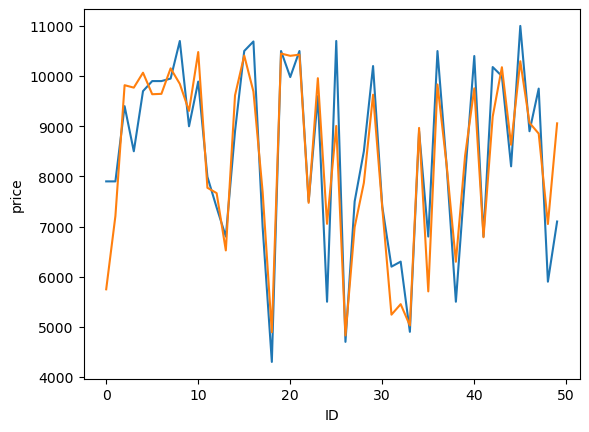

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='ID',y='price',data=Results.head(50))
sns.lineplot(x='ID',y='predicted',data=Results.head(50))
plt.plot()